# Tu primer árbol de decisión con scikit-learn

In [55]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

Dataset columns:

0: Survived Indicator- variable objetivo

1: Passenger Class

2: Name

3: Sex

4: Age

5: Siblings Aboard

6: Parents Aboard

7: Fare paid in £s

In [56]:
#Cargamos dataset a utilizar
df = pd.read_csv('/home/roy/Ramdom_forest_y_arboles_de_decision/data/titanic.csv',sep=',')

## Exploración de datos

In [57]:
#Visualizacion del DataFrame
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [58]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name','Fare']
df.drop(columns_to_drop,axis='columns',inplace=True)

In [59]:
#Renombramos las columnas
df.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [60]:
#Analizamos el shape del objeto
print(df.shape)

(887, 6)


In [61]:
#Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


codificacion de sex

In [74]:
#Cambiamos los tipos de datos
df = df.replace(['male','female'],[1,0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    int64  
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.7 KB


In [64]:
#Reemplazar el DataFrame
# df.rename(columns= = {'Sex_male':'Sex'}, inplace=True) este codigo sirve para remplazar el nombre de una columna 
# no lo hice porque no cambiel el nombre de la columna 

In [77]:
#Ordenar columnas por nombres
# df = df[['Survived','Pclass','Sex','Age','SibSp','Parch']] si se desordenaron ordena de esta manera 
# df.head()

## Entrenamiento de árbol de decisión con scikit-learn

In [78]:
#Separamos en X e y
X = df.drop('Survived',axis=1)
y = df.Survived

In [79]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [80]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
#max_depth es el nivel de profundidad del arbol 

In [81]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Evaluación del modelo

In [82]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train) # variables de entrenamieto 
y_test_pred = tree.predict(X_test)# variables de test

In [83]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train,y_train_pred)#valor real , valor predicho 
test_accuracy = accuracy_score(y_test,y_test_pred)#valor real , valor predicho 
#Calculo el accuracy en Test
print(f'El accuracy en train es {train_accuracy}')
print(f'El accuracy en test es {test_accuracy}')

El accuracy en train es 0.8064516129032258
El accuracy en test es 0.7378277153558053


como los valores son cercanos entre si, nos permite inferir que el modelo tiene un performance adecuada para entrenamiento y testeo 

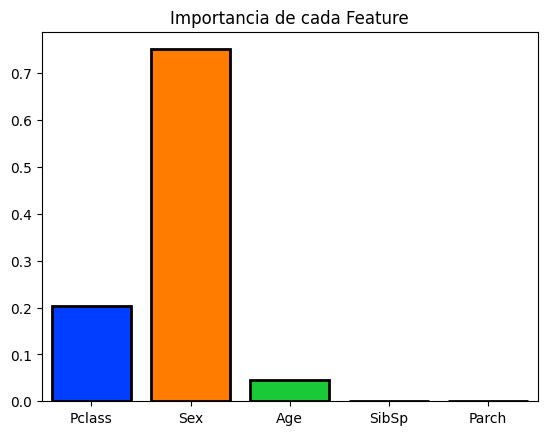

In [85]:
#Verificamos el feature importances
import seaborn as sns 

importances = tree.feature_importances_ # almacenando la importancia de cada una de las features 
columns = X.columns # variables que no son el target 
data = pd.DataFrame([importances], columns=columns)

sns.barplot(
    data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2
)
plt.title('Importancia de cada Feature')
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: "Survived", los features más importantes son: Sex es decir que pasajero sobrevivio o no, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 

## ¿Cómo funcionan los árboles de decisión?

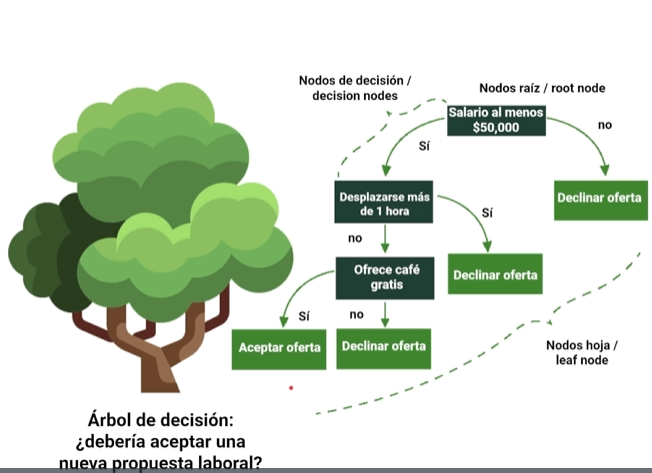

Nodo raíz: Imagina el árbol como un sistema de decisiones. El nodo raíz es el punto de partida, como una pregunta principal que nos ayuda a tomar decisiones. Es el primer paso en el árbol, desde donde comienza todo.

División: En el árbol de decisión, cada nodo raíz o intermedio realiza una "división" basada en una característica o atributo específico. Esto significa que se hace una pregunta sobre algún aspecto del problema que estamos tratando de resolver.

Nodo de decisión: Cada nodo de decisión representa una pregunta que debe ser respondida con "sí" o "no", dependiendo de los datos disponibles. La respuesta a esta pregunta nos lleva a uno de los siguientes nodos o ramas del árbol.

Nodo de hoja o terminal: Son los nodos finales del árbol y no realizan ninguna división. Representan las conclusiones o resultados de las decisiones tomadas en los nodos de decisión anteriores. En otras palabras, son las respuestas o soluciones a nuestro problema.

Poda (pruning): La poda es un proceso de optimización que se realiza en los árboles de decisión para evitar que se vuelvan demasiado complejos o sobreajustados a los datos de entrenamiento. Consiste en eliminar nodos de hojas que pueden no ser muy relevantes o que no contribuyen significativamente al rendimiento general del árbol.

Rama/Subárbol: Una rama es una secuencia de nodos conectados, que comienzan desde el nodo raíz y terminan en un nodo de hoja. Un subárbol es una porción más pequeña del árbol de decisión que contiene nodos y ramas de un árbol más grande.

Nodo madre/padre e hijo: Cuando un nodo se divide, se crean dos o más nodos nuevos a partir de él. El nodo original se conoce como "nodo madre" o "nodo padre" y los nodos recién creados se llaman "nodos hijos".

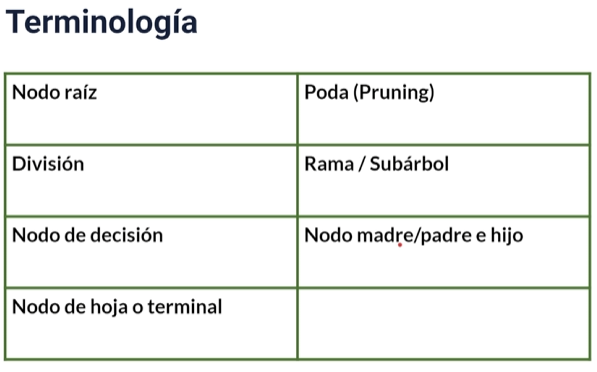

## ¿Cuándo usar árboles de decisión?


### Ventajas:

Algoritmo de caja blanca.

Resultados faciles de interpretar y entender.

Las combinaciones de los mismos pueden dar resultados muy certeros. Por ejemplo, random forest.

### Desventajas:

Tienden a sobreajuste u overfitting cuando hay poca cantidad de datos.

Se ven influenciadas por los outliers(valores muy diferentes).

Crear arboles demasiado complejos puede conllevar que no se adapten bien a los nuevos datos.

Se pueden crear arboles sesgados si una de las clases es mas numerosa.

### ¿Cuando usar arboles de decision?

Sencillo y facil de entender.

Funcionan bastante bien con grandes conjuntos de datos.

Relativamente robusto.

Es un metodo muy util para analizar datos cuantitativos.

Aplica para problemas de clasificacion y regresion.